# POLI 175 - Lecture 14

## Linear Model Selection and Regularization I

## Announcement

- Problem Set 02 is on!

- This lecture's participation quiz is on.

- The lecture quiz will be on early tomorrow.

- Problem Set 02 is harder. Please reach out if you need help.

# Linear Model Selection and Regularization

## Linear Model Selection and Regularization

- We usually have a large set of predictors that could be used.
    + Which predictors to pick becomes a task.

- If we are trying to interpret things and learn from the data, then which predictors are correlated with the outcome is informative:
    + Again, picking predictors becomes a task.
    
- In this and the following lecture, we will learn how to do that systematically. 

## Linear Model Selection and Regularization

### Subset Selection

- In here, we are going to consider techniques to select a subset of predictors based on a performance metric.

## Linear Model Selection and Regularization

### Subset Selection

#### Best Subset Selection

**Algorithm:**

1. Let $M_0$ denote the null model, which contains no predictors. This model predicts the sample mean for each observation.

2. For $k = \{1, 2, \cdots, p\}$:
    1. Fit all $p \choose k$ models with exactly $k$ predictors.
    2. Pick the *best* among these models and call it your $M_k$

3. Select a single best model from among $M_0, \cdots, M_p$ using cross-validated prediction error, $C_p$, AIC, BIC, or adjusted $R^2$.

## Linear Model Selection and Regularization

### Subset Selection

#### Best Subset Selection

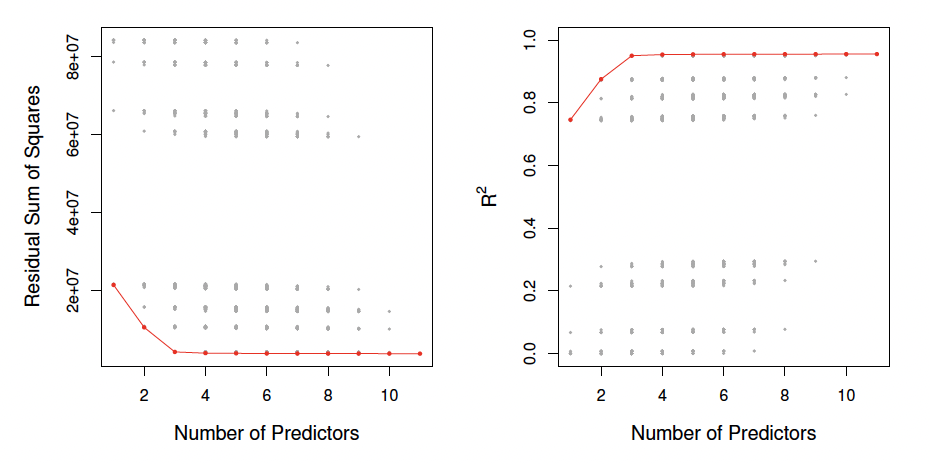

## Linear Model Selection and Regularization

### Subset Selection

#### Best Subset Selection

Notes:

1. You can do this with Logistic Regression: change RSS with [*deviance*](https://en.wikipedia.org/wiki/Deviance_(statistics)).
    + In this case, our friend $- 2\ln({\hat {L}})$ does very well!

2. Best Selection is excellent but fits around $2^p$ models.
    + $p = 10$ means around 1000 estimates.

## Linear Model Selection and Regularization

### Subset Selection

#### Stepwise Selection: Forward Selection

**Algorithm**:

1. Let $M_0$ denote the null model, which contains no predictors.

2. For $k = \{0, 1, 2, \cdots, p-1\}$:
    1. Consider all $p - k$ models that augments $M_k$ by one predictor.
    2. Pick the *best* among these $p-k$ models, and call it your $M_{k+1}$.

3. Select a single best model from among $M_0, \cdots, M_p$ using cross-validated prediction error, $C_p$, AIC, BIC, or adjusted $R^2$.

## Linear Model Selection and Regularization

### Subset Selection

#### Stepwise Selection: Forward Selection

- Much more efficient:
    + It fits a total of $1 + \dfrac{p(p+1)}{2}$ models.
    + If $p = 20$, the Best Selection would fit 1,048,576
    + If $p = 20$, the Forward Step Selection would fit 211 models.

## Linear Model Selection and Regularization

### Subset Selection

#### Stepwise Selection: Forward Selection

- The catch: It is not guaranteed that it is going to find the *best subset* model.

- Example: Let $p = 3$.
    + Suppose that the best model involves $v2$ and $v3$.
    + But suppose that within the models with only one variable, $v1$ would do better.
    + Then, Forward Step Selection would never pick this model!

## Linear Model Selection and Regularization

### Subset Selection

#### Stepwise Selection: Forward Selection

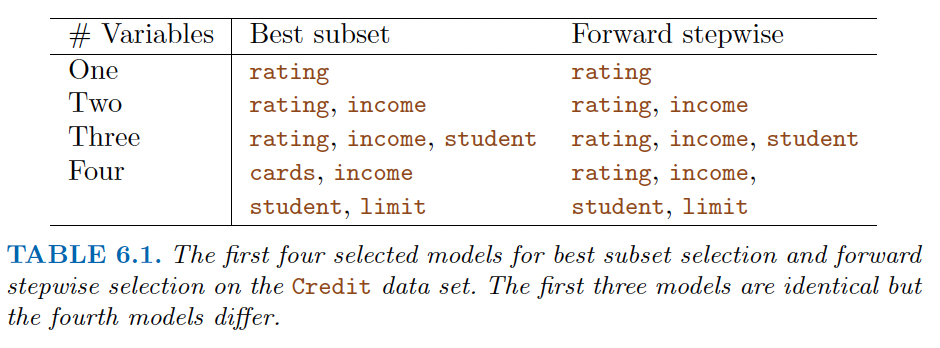

## Linear Model Selection and Regularization

### Subset Selection

#### Stepwise Selection: Backward Selection

**Algorithm**:

1. Let $M_p$ denote the *full* model, which contains all $p$ predictors.

2. For $k = \{p, p-1, p-2, \cdots, 1\}$:
    1. Consider all $k$ models that contail all but one predictor in $M_k$, for a total of $k-1$ predictors.
    2. Pick the *best* among these $k$ models, and call it your $M_{k-1}$.

3. Select a single best model from among $M_0, \cdots, M_p$ using cross-validated prediction error, $C_p$, AIC, BIC, or adjusted $R^2$.

## Linear Model Selection and Regularization

### Subset Selection

#### Stepwise Selection: Backward Selection

- Computational Efficiency:
    + It fits a total of $1 + \dfrac{p(p+1)}{2}$ models.
    + Same efficiency as the Forward Selection.

- Catch:
    + Same catch as the Forward Selection: It does not guarantee the pick of the best model.

## Linear Model Selection and Regularization

### Subset Selection

#### Stepwise Selection: Hybrid Approaches

- Combinations of *Forward* and *Backwards* that intend to mimic the *Best Selection*.

- Many available.

- But the trade-offs are clear: 
    + Computational efficiency
    + Likelihood of picking the best model

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- For each of the $M_k$ models, this is it:
    + RSS: Residual Sum of Squares: We want it to be the lowest possible.
    + $R^2$: We want it to be the highest possible.
    + And for Logistic or other GLM Regressions, *deviance*.

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- Catches: 
    1. RSS and $R^2$ always improve with more variables.
    2. We want to look at the *testing set goodness-of-fit*, not the *training sets goodness-of-fit*!

- And that is why RSS and $R^2$ are not used in Step 3:
    - We need something that eventually gets worse the more variables we throw in.

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

**Important:**

- Training Set MSE generally underestimates the testing set MSE.

$$ \text{MSE} \ = \ \dfrac{RSS}{n} $$

- But before, we could not split data into *training* and *testing*. 
    + This is a more recent feature, thanks to our increased computational power.

- Here are a few stats that we can fit in the training set.

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- [$C_P$](https://en.wikipedia.org/wiki/Mallows%27s_Cp) in a model containing:
    - $d$ predictors.
    - $n$ observations.
    - $\widehat{\sigma}^2$ the variance of the error in the full model with all predictors.

$$ C_p \ = \ \dfrac{1}{n}(RSS + 2\times d \times \widehat{\sigma}^2) $$

- The smaller, the better.

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) or $C_p$: AIC is a goodness-of-fit parameters that goes lower when you are improving the model
    + But for every variable you add, it penalizes it.
    + If by adding more variables, it goes up, then your model is getting more complex without adding much.
    
$$ \text{AIC} \ = \ 2d - 2\log({\hat {L}}) $$

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- The maximum likelihood and least squares are the same for models with Gaussian errors.

$$ \text{AIC} \ = \ \dfrac{1}{n} (RSS + 2\times d \times \widehat{\sigma}^2) $$

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) is another goodness-of-fit, but this one penalizes the addition of variables at a higher rate.

$$ \text{BIC} = k\log(n) - 2\log({\widehat {L}}) $$

- Note the difference from the AIC: instead of multiplying by 2, it is multiplying by $\ln(n)$!

- Again, lower values are better.

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- Or if you want the one with the least square errors:

$$ \text{AIC} \ = \ \dfrac{1}{n} (RSS + \log(n) \times d \times \widehat{\sigma}^2)  $$ 

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- [Adjusted $R^2$](https://en.wikipedia.org/wiki/Bayesian_information_criterion): It is a change in the $R^2$ to penalize the addition of regressors.

$$ \overline{R}^{2} = 1-(1-R^{2})\dfrac{n-1}{n-p} \ = \ 1 - \dfrac{\frac{RSS}{n - d - 1}}{\frac{TSS}{n - 1}}$$

- $R^2$ always increase but the $\overline{R}^2$ may increase or decrese.

- **Not like the others:** This one, the higher, the better.

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

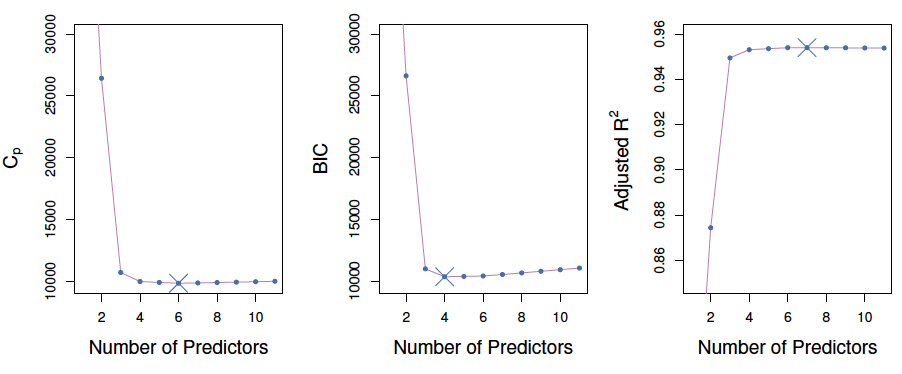

## Linear Model Selection and Regularization

### Subset Selection

#### What is Best?

- $C_P$, AIC, and BIC all have a solid theoretical justification.
    + Many of them have something we call Large Sample Properties.
    + Check their Wikipedia of them. They converge to nice, important values.

- $\overline{R}^{2}$ does not.

## Linear Model Selection and Regularization

### Subset Selection

#### What is best? Validation and Cross-Validation

- The main advantage is obvious: You look at testing errors!

- The other main advantage is regarding estimating parameters:
    + $C_P$, AIC, and BIC all have a strong theoretical justification, which is reassuring.
    + But sometimes, one does not know the theory behind an estimate to compute statistics or even standard errors.
    + E.g., which $\widehat{\sigma}^2$ should we pick?
    + Validation and Cross-Validation do great in these cases!

## Linear Model Selection and Regularization

### Subset Selection

#### What is best? Validation and Cross-Validation

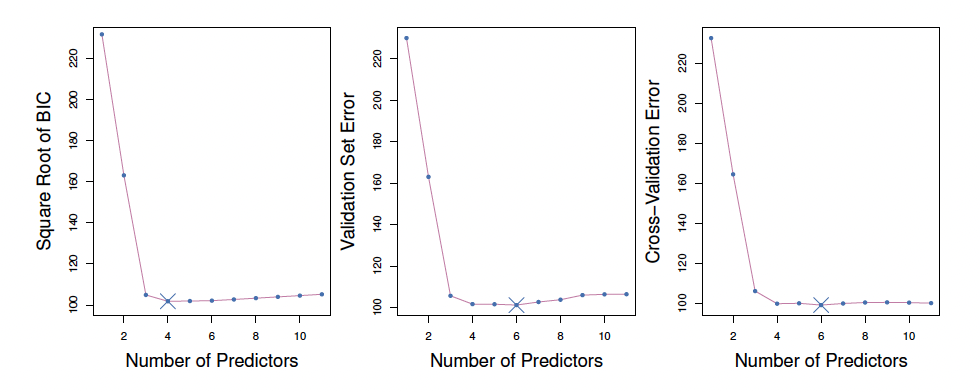

## Class Examples

- Education expenditure dataset

- Pinochet voting dataset

Let us load them all:

In [1]:
## Loading the relevant packages
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading scikit learn relevant packages (note our new friends!)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## Loading Chile data
chile = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/chilesurvey.csv')
chile_clean = chile.dropna()
chile_clean = chile_clean[chile_clean['vote'].isin(['Y', 'N'])]
chile_clean['vote'] = np.where(chile_clean['vote'] == 'Y', 1, 0)
chile_clean['logincome'] = np.log(chile_clean['income'])
chile_clean['logpop'] = np.log(chile_clean['population'])
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['region'], prefix = 'region', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['education'], prefix = 'education', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
chile_clean.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M,region_M,region_N,region_S,region_SA,education_PS,education_S
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541,1,0,1,0,0,0,0
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541,1,0,1,0,0,1,0
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541,0,0,1,0,0,0,0
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541,0,0,1,0,0,0,0
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541,0,0,1,0,0,0,1


In [3]:
## Education Expenditure Dataset
educ = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/educexp.csv')
educ = educ.set_index('states')
for i in educ.columns:
    educ[i + '_log'] = np.log(educ[i])
educ.head()

,education,income,young,urban,education_log,income_log,young_log,urban_log
states,,,,,,,,
ME,189,2824,350.7,508,5.241747,7.945910,5.859931,6.230481
NH,169,3259,345.9,564,5.129899,8.089176,5.846150,6.335054
VT,230,3072,348.5,322,5.438079,8.030084,5.853638,5.774552
MA,168,3835,335.3,846,5.123964,8.251925,5.815026,6.740519
RI,180,3549,327.1,871,5.192957,8.174421,5.790266,6.769642


## Classification

### K-Nearest Neighbors Classifier

- Little detour back to talk about a good algorithm for classification (also very intuitive).

- Given an integer $K$, and a test observation, it says that:

$$ \mathbb{P}(Y = j| X = x_0) \ = \ \dfrac{1}{K}\sum_{i \in N_0} I(y_i = j) $$

- Meaning: classify the observation based on the class of the closest $K$ obs:
    + The one more frequent is the winner.
    
- Closest: the idea of a metric.

## Classification

### K-Nearest Neighbors Classifier

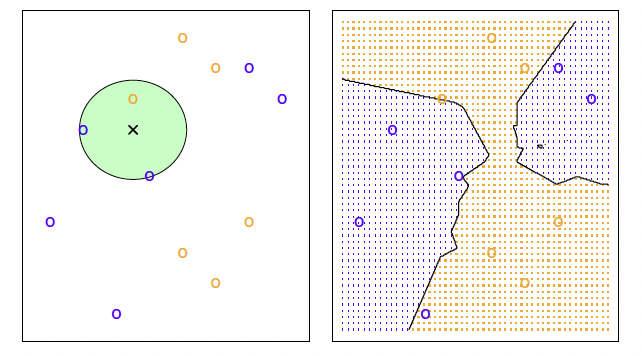

## Classification

### K-Nearest Neighbors Classifier

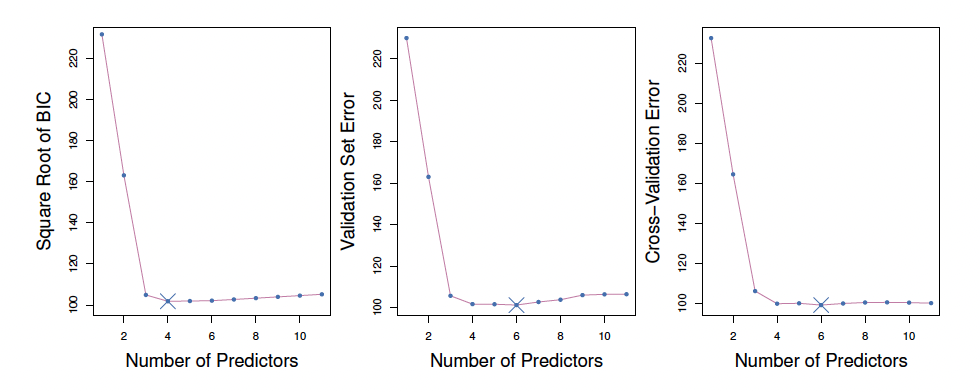

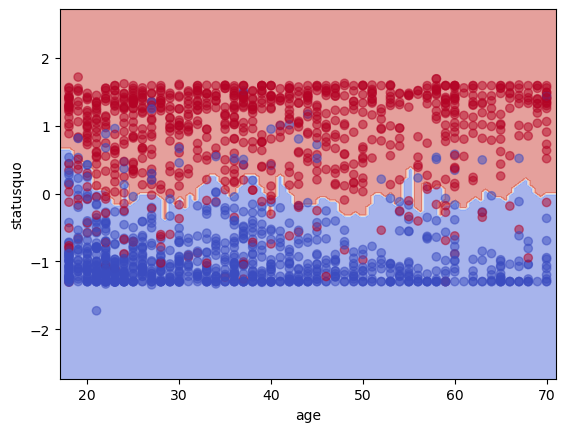

In [4]:
# KNN
X = chile_clean[['age', 'statusquo']]
y = chile_clean['vote']

# Create the model
knn = KNeighborsClassifier(n_neighbors = 10).fit(X, y)

# Plotting the tree boundaries
fig = DecisionBoundaryDisplay.from_estimator(knn, X, response_method="predict",
                                             alpha=0.5, cmap=plt.cm.coolwarm)

# Plotting the data points    
fig.ax_.scatter(x = chile_clean['age'], y = chile_clean['statusquo'], 
                c = y, alpha = 0.5,
                cmap = plt.cm.coolwarm)

plt.show()

In [5]:
## Now choose K!
bigK = list(range(1, 100))
errmea = []
y = chile_clean['vote']
X = chile_clean[['statusquo', 'logincome', 'logpop', 'age']]
for smallk in bigK:
    cv = KFold(n_splits = 10, random_state = 1234, shuffle = True)
    knn = KNeighborsClassifier(n_neighbors = smallk)
    scores = cross_val_score(knn, X, y, 
                             scoring = 'accuracy',
                             cv = cv, n_jobs = -1)
    errmea.append(1-scores.mean())
print('Best K is {a}.'.format(a = str(bigK[errmea.index(min(errmea))])))

Best K is 8.


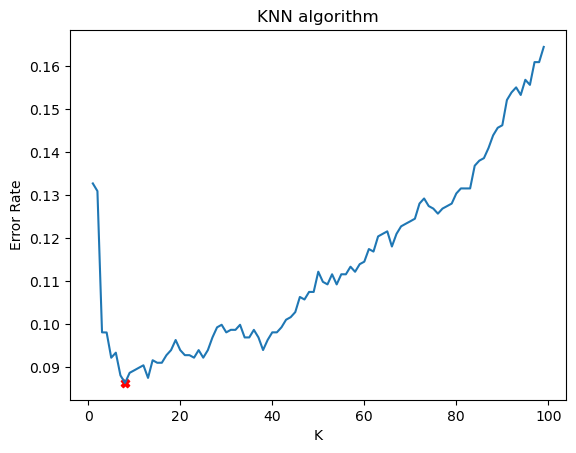

In [6]:
sns.lineplot(x = bigK, y = errmea)
plt.title('KNN algorithm')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.scatter(bigK[errmea.index(min(errmea))], min(errmea), marker='X', color = 'red')
plt.show()

# Questions?

# See you next class


In [7]:
## Prestige Dataset
prestige = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/Duncan.csv')
prestige = prestige.set_index('profession')
dummies = pd.get_dummies(prestige['type'], prefix = 'type', drop_first = True)
prestige = pd.concat([prestige, dummies], axis=1)
prestige.head()

,type,income,education,prestige,type_prof,type_wc
profession,,,,,,
accountant,prof,62,86,82,1,0
pilot,prof,72,76,83,1,0
architect,prof,75,92,90,1,0
author,prof,55,90,76,1,0
chemist,prof,64,86,90,1,0
